In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
lots = pd.read_csv('data/Lots.csv')

# Classification des attributs

In [4]:
lots_metadata = pd.read_csv('data/Lots_metadata.csv')

In [5]:
lots_metadata

,variable,signification,nature
0,lotId,Clé primaire,Catégorielle
1,tedCanId,ID TED de l’avis d’attribution du lot,Catégorielle
2,correctionsNb,Nombre de correctifs publiés pour ce lot,Numérique
3,cancelled,Booléen indiquant si l’appel d’offres du lot a été annulé,Catégorielle
4,awardDate,Date à laquelle la décision d’attribution a été prise pour ce lot,Catégorielle
5,awardEstimatedPrice,Estimation du prix du lot effectuée dans l’appel d’offres,Catégorielle
6,awardPrice,Prix effectif du lot indiqué dans l’avis d’attribution,Catégorielle
7,cpv,Code Common Procurement Vocabulary du lot,Catégorielle
8,numberTenders,Nombre d’offres effectuées pour le lot,Numérique
9,onBehalf,Booléen indiquant que l’acheteur est un groupement,Catégorielle


## Distribution de la nature

In [6]:
nature = lots_metadata['nature']

In [7]:
nature_vc = nature.value_counts()

In [8]:
nature_vc

Catégorielle    22
Numérique        4
Name: nature, dtype: int64

In [9]:
data = pd.DataFrame({
        'label':nature_vc.index.values
})
data["nature"] = nature_vc.values
data["proportion"] = (data["nature"]/ data["nature"].sum())*100

In [10]:
data

,label,nature,proportion
0,Catégorielle,22,84.615385
1,Numérique,4,15.384615


Nous pouvons voir que sur **26** variables, nous n'avons que **4 (15.38%)** qui sont numériques et les autres sont catégorielles

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_nature_1(data, logy=True):
    # Creating the bar plot
    plt.figure(figsize=(8, 6))
    
    # Utiliser une colormap pour les couleurs des barres
    colors = plt.cm.viridis(data["proportion"]/100) 

    # Ajouter une barre de couleur (légende) pour indiquer les valeurs
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
    cbar.set_label('Couleurs')
    
    X = data["label"]
    y = data["proportion"]
    plt.bar(X, y, color=colors)
    # Adding titles and labels
    plt.title("Nature des variables")
    plt.xlabel("Nature")
    plt.ylabel("Proportion des variables")
    # plt.xticks(rotation=90)
    if logy:
        plt.yscale('log')
    plt.show()

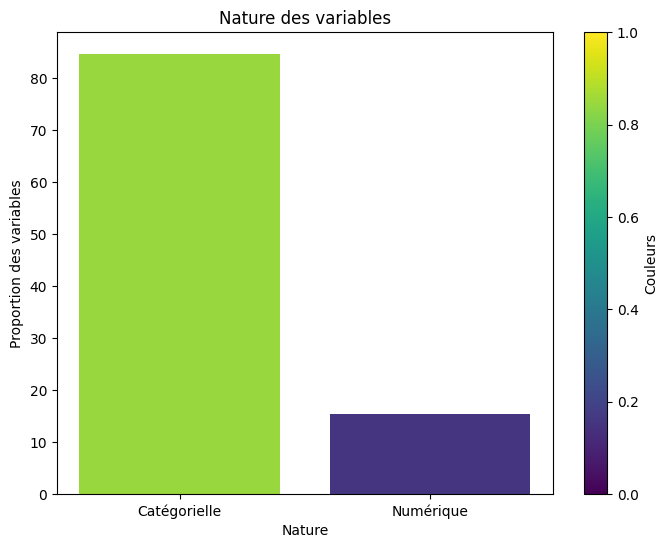

In [13]:
plot_nature_1(data, logy=False)

# Les corrélations à calculer

Nous avons **26 attributs**, pour calculer les correlations, nous commençons d'abord par enlever les identificants ou codes, car leur objectif c'est juste d'identifier les éléments.

Dans notre cas nous avons **3 attributs** qui sont des codes: **lotId**, **tedCanId** et **cpv**

Donc il nous reste **23 variables** et dans ces **23 attributs**, nous enlevons ceux qui ont assez de valeurs manquantes, c'est-à-dire dont la proportion de valeurs manquantes est **supérieure ou égale à 50%**

In [84]:
nan_counts_df = lots.isna().sum().reset_index()
nan_counts_df.columns = ['variable', 'nan_count']
nan_counts_df['proprotion'] = (nan_counts_df['nan_count']/len(lots))*100
nan_counts_df['calculer'] = nan_counts_df['proprotion'].apply(lambda x: 'OUI' if x < 50 else 'NON')

In [85]:
nan_counts_df

,variable,nan_count,proprotion,calculer
0,lotId,0,0.000000,OUI
1,tedCanId,0,0.000000,OUI
2,correctionsNb,0,0.000000,OUI
3,cancelled,0,0.000000,OUI
4,awardDate,186671,13.517432,OUI
5,awardEstimatedPrice,1191352,86.269529,NON
6,awardPrice,426323,30.871383,OUI
7,cpv,71,0.005141,OUI
8,numberTenders,424099,30.710337,OUI
9,onBehalf,282543,20.459823,OUI


In [103]:
to_calcul_df = nan_counts_df[
    (~nan_counts_df['variable'].isin(['lotId', 'tedCanId', 'cpv']))&
    (nan_counts_df['calculer'] == 'OUI')
].reset_index(drop=True)

In [104]:
to_calcul_df

,variable,nan_count,proprotion,calculer
0,correctionsNb,0,0.000000,OUI
1,cancelled,0,0.000000,OUI
2,awardDate,186671,13.517432,OUI
3,awardPrice,426323,30.871383,OUI
4,numberTenders,424099,30.710337,OUI
5,onBehalf,282543,20.459823,OUI
6,fraAgreement,0,0.000000,OUI
7,lotsNumber,295428,21.392867,OUI
8,outOfDirectives,0,0.000000,OUI
9,subContracted,681245,49.331084,OUI


In [95]:
import math

In [107]:
n_variables = len(to_calcul_df)
n_correlations = math.factorial(n_variables) // (math.factorial(2)*math.factorial(n_variables-2))

In [106]:
n_variables

16

In [108]:
n_correlations

120

Après calcul nous reste **16 variables** donc nous avons :

$$ C_{16}^{2} = \frac{16!}{2!(16-2)!}$$

Ce qui nous fait **120** correlations à calculer

# Correlation entre cancelled et correctionsNb

In [14]:
df = lots[['correctionsNb', 'cancelled']]

In [15]:
df

,correctionsNb,cancelled
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1380960,0,0
1380961,0,0
1380962,0,0
1380963,0,0


In [16]:
df['cancelled'].value_counts()

0    1380685
1        280
Name: cancelled, dtype: int64

In [17]:
df['correctionsNb'].value_counts()

0    1375786
1       5089
2         90
Name: correctionsNb, dtype: int64

## Graphe de corrélation

In [18]:
gb_1 = df.groupby(['cancelled', 'correctionsNb']).size().unstack(fill_value=0)

In [19]:
gb_1

correctionsNb,0,1,2
cancelled,,,
0,1375507,5088,90
1,279,1,0


In [20]:
def corr_cancelled_correctionsNb_1(data, logy=True):
    data.plot(kind='bar', stacked=False)
    # Adding titles and labels
    plt.title("Correlation entre annulation et nombre de correction")
    plt.xlabel('Annulation')
    plt.ylabel('Nombre de correction')
    if logy:
        plt.yscale('log')
    plt.show()

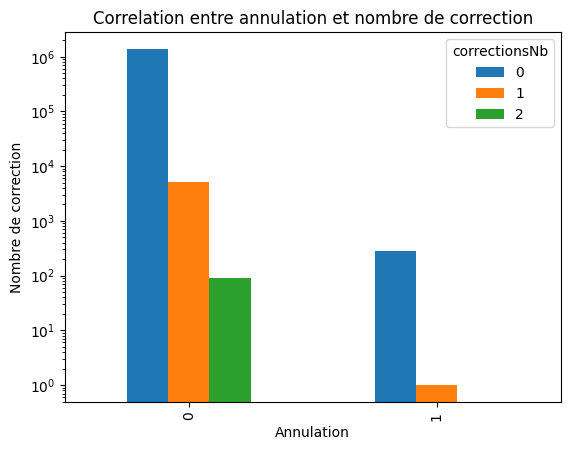

In [21]:
corr_cancelled_correctionsNb_1(gb_1)

Nous pouvons voir que le plus grand nombre de lots sont les lots n'ayant pas été modifié et n'ayant pas été annulé

## Coéfficient de corrélation

La variable **cancelled** étant une variable **catégorielle binaire** et **correctionsNb** étant une variable numérique, nous allons étudier le **coefficient de corrélation bisérial point** pour mésurer la correlation entre ces 2 variables

In [22]:
from scipy.stats import pointbiserialr

In [23]:
binary_attribute = df['cancelled'].astype('category')
numeric_attribute= df['correctionsNb'].astype(int)
corr_coeff, p_value = pointbiserialr(binary_attribute, numeric_attribute)

In [24]:
corr_coeff

-5.542318591446514e-05

Nous pouvons voir que cette valeur valeur est **négative** et **assez proche de 0**, donc nous pouvons dire qu'il n'y a **pas de correlation** entre le nombre de correction apporté à un lot et son annulatiaon

In [25]:
p_value

0.9480703249740478

Le fait que la valeur de **p_value** soit aussi **élévée** nous permet de dire que la corrélation entre le nombre de lots et son annulation est **simplement dû au hasard** ou n'est pas **statistiquement significatif**

Vu que les 2 variables n'ont pas assez de valeurs unique, nous pouvons créer un tableau de contigence pour ces variables puis calculer le coefficient de corrélation

In [26]:
from scipy.stats import chi2_contingency

In [27]:
var1 = df['cancelled'].astype('category')
var2 = df['correctionsNb'].astype('category')

In [28]:
contingency_table = pd.crosstab(var1, var2)

In [29]:
contingency_table

correctionsNb,0,1,2
cancelled,,,
0,1375507,5088,90
1,279,1,0


In [30]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = (chi2 / n)**0.5

In [31]:
chi2

0.01924284673420908

Cette valeur étant petite celà veut dire ces 2 variables sont **indépendantes**

In [32]:
p

0.9904247144376845

Une grande pour p implique que les valeurs sont **indépendantes**

In [33]:
cramer_v

0.00011804383884902163

Une petite valeur pour **crammer_v** implique les variables ne sont pas associées

# Correlation entre cancelled et numberTenders

In [34]:
df = lots[['numberTenders', 'cancelled']]

In [35]:
df

,numberTenders,cancelled
0,NaN,0
1,NaN,0
2,NaN,0
3,11.0,0
4,6.0,0
...,...,...
1380960,2.0,0
1380961,2.0,0
1380962,3.0,0
1380963,1.0,0


In [36]:
df_new = df.dropna()

In [37]:
df_new['numberTenders'] = df_new['numberTenders'].astype(int)

In [38]:
df_new

,numberTenders,cancelled
3,11,0
4,6,0
8,5,0
9,2,0
10,4,0
...,...,...
1380960,2,0
1380961,2,0
1380962,3,0
1380963,1,0


## Graphe de corrélation

In [39]:
numberTenders = df_new['numberTenders']

In [40]:
bins = [numberTenders.min() - 1, 2, 4, 6, numberTenders.max()]
df_new['interval'] = pd.cut(numberTenders, bins=bins, precision=0)

In [41]:
df_new

,numberTenders,cancelled,interval
3,11,0,"(6, 999]"
4,6,0,"(4, 6]"
8,5,0,"(4, 6]"
9,2,0,"(-1, 2]"
10,4,0,"(2, 4]"
...,...,...,...
1380960,2,0,"(-1, 2]"
1380961,2,0,"(-1, 2]"
1380962,3,0,"(2, 4]"
1380963,1,0,"(-1, 2]"


In [42]:
gb_1 = df_new.groupby(['cancelled', 'interval']).size().unstack(fill_value=0)

In [43]:
gb_1

interval,"(-1, 2]","(2, 4]","(4, 6]","(6, 999]"
cancelled,,,,
0,327838,296240,146472,186138
1,33,37,35,73


In [44]:
def corr_cancelled_numberTenders_1(data, logy=True):
    data.plot(kind='bar', stacked=False)
    # Adding titles and labels
    plt.title("Correlation entre annulation et le nombre d'offre")
    plt.xlabel('Annulation')
    plt.ylabel("Nombre d'offre")
    if logy:
        plt.yscale('log')
    plt.show()

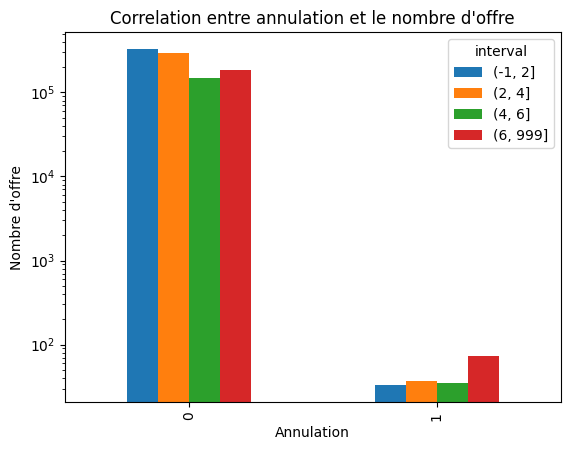

In [45]:
corr_cancelled_numberTenders_1(gb_1)

Nous pouvons constater que parmi les offres annulé, la majeur partie sont des offres qui concernent au maximum **2 lots**

Pour les offres non annulé, la majeur partie sont des offres qui concernent au minimum **2 lots**

## Coéfficient de corrélation

In [46]:
df_new = df.dropna()

In [47]:
df_new

,numberTenders,cancelled
3,11.0,0
4,6.0,0
8,5.0,0
9,2.0,0
10,4.0,0
...,...,...
1380960,2.0,0
1380961,2.0,0
1380962,3.0,0
1380963,1.0,0


In [48]:
binary_attribute = df_new['cancelled'].astype('category')
numeric_attribute= df_new['numberTenders'].astype(int)
corr_coeff, p_value = pointbiserialr(binary_attribute, numeric_attribute)

In [49]:
corr_coeff

0.006012417309949352

In [50]:
p_value

4.068999833246837e-09

# Correlation entre cancelled et lotsNumber	

## Graphe de corrélation

In [51]:
df = lots[['cancelled', 'lotsNumber']]

In [52]:
df

,cancelled,lotsNumber
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [53]:
df_new = df.dropna()

In [54]:
df_new

,cancelled,lotsNumber
284,0,1
300,0,1
319,0,1
320,0,2
321,0,3
...,...,...
1380952,0,3
1380953,0,4
1380954,0,5
1380955,0,6


## Coefficient de corrélation

# Corrélation entre correctionsNb et cancelled	

In [ ]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre correctionsNb et publicityDuration",
    xlabel='correctionsNb',
    ylabel='publicityDuration',
    logy=True
)

In [ ]:
df = lots[['awardDate', 'gpa']]
df = process_date(df)
gb_1 = df.groupby(['month','gpa']).size().unstack(fill_value=0)
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre awardDate et gpa",
    xlabel="month",
    ylabel="gpa",
    logy=True
)

In [ ]:
plot_numerical_numerical(
    data=df,
    title='',
    xlabel='',
    ylabel='',
    logy=True
)